7.2 EJERCICIO MODULO 3 VISUALIZACIONES

## Ejercicios

Utilizando el conjunto de datos que terminamos de limpiar ayer, contesta a las siguientes preguntas utilizando la visualización más apropiada. 

1.  ¿Cómo se distribuyen los precios de los productos?

2. ¿Cuál es la relación entre el precio y la calificación promedio de los productos? 

3. ¿Qué porcentaje de productos tiene el distintivo "Producto local"?

4.  ¿Qué porcentaje de productos tiene el distintivo "Buena calidad del producto".

5.  ¿Cómo se distribuyen los precios de los productos en función de si se utilizan anuncios promocionales (`uses_ad_boosts`) o no?

6. ¿Existe una relación entre el uso de anuncios y las unidades vendidas? 

7. ¿Cuál es la distribución de las calificaciones de los empleados (`rating_employee`) para los productos que tienen el distintivo "Buena calidad del producto" (`badge_product_quality`) y para los que no lo tienen? Haced que las dos gráficas tengan la misma escala en los dos ejes. 

8. ¿Qué países reciben más productos de este conjunto de datos? Muestra un gráfico de barras horizontales.

9. ¿Cómo varía el precio promedio de los productos por país de origen?

10. ¿Cuál es la relación entre el precio de envío y las unidades vendidas?

11. Compara diferentes distribuciones de precios de productos en función de si tienen el distintivo "Producto local" o "Buena calidad del producto". Tendréis que crear dos gráficas en un subplot, en la primera poner los precios de los productos locales ("badge_local_product")


In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [17]:
df = pd.read_csv("merchant_fill_nonulls.csv", index_col = 0)
df.head(2)

,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_five_count
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,No,3.76,54,No,Buena,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,No,34,50,CN,zgrdejia,Unknown,568,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,1,100,100.0,4.129,568.0,16.00,14.00,54.0,14.29,Buena,8.0,10.0,1.0,9.0,26.0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.0,22,20000,Si,3.45,6135,No,Buena,No,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,2,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-63.64,Regular,1027.0,1118.0,644.0,1077.0,2269.0


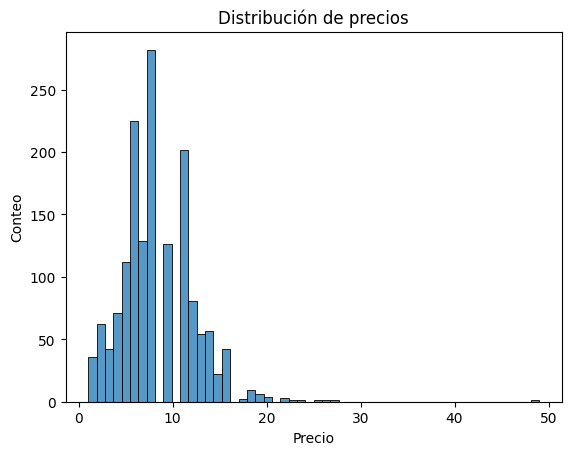

In [18]:
# 1.  ¿Cómo se distribuyen los precios de los productos? 
sns.histplot(x = "price", data = df)
plt.title("Distribución de precios")
plt.xlabel("Precio")
plt.ylabel("Conteo");

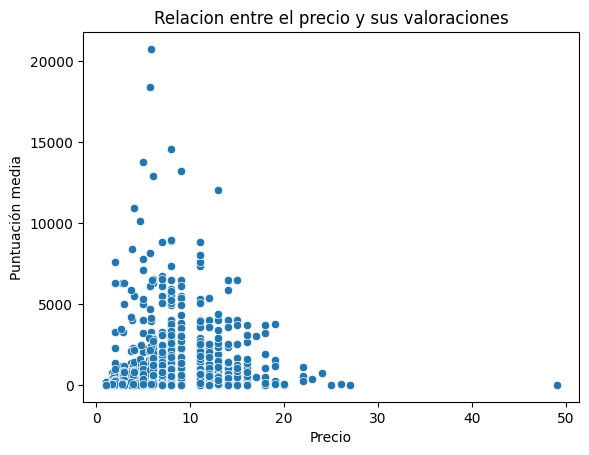

In [24]:
# 2. ¿Cuál es la relación entre el precio y la calificación promedio de los productos?
sns.scatterplot(x = "price", y = "mean_product_ratings_count", data = df)
plt.ylabel("Puntuación media")
plt.xlabel("Precio")
plt.title("Relacion entre el precio y sus valoraciones");

In [28]:
len(df["product_id"].unique())

1341

In [27]:
df.shape

(1573, 40)

In [30]:
# 3. ¿Qué porcentaje de productos tiene el distintivo "Producto local"?
df_local = df["badge_local_product"].value_counts().reset_index()
df_local

,badge_local_product,count
0,No,1544
1,Si,29


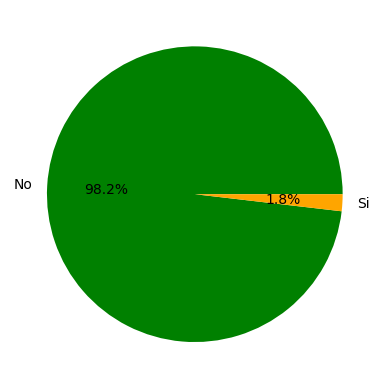

In [34]:
plt.pie( df_local["count"], 
        labels = df_local["badge_local_product"], 
        autopct = "%1.1f%%", 
        colors = ["green", "orange"]);

In [37]:
# 4.  ¿Qué porcentaje de productos tiene el distintivo "Buena calidad del producto".
df_calidad = df["badge_product_quality"].value_counts().reset_index()
df_calidad

,badge_product_quality,count
0,Buena,1456
1,Excelente,117


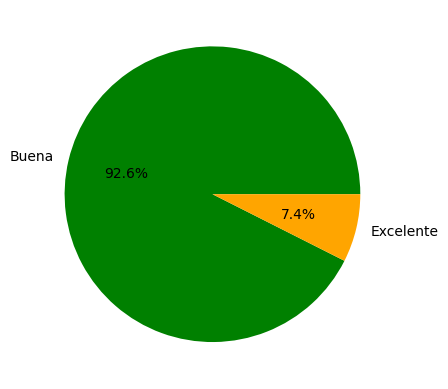

In [39]:
plt.pie( df_calidad["count"], 
        labels = df_calidad["badge_product_quality"], 
        autopct = "%1.1f%%", 
        colors = ["green", "orange"]);

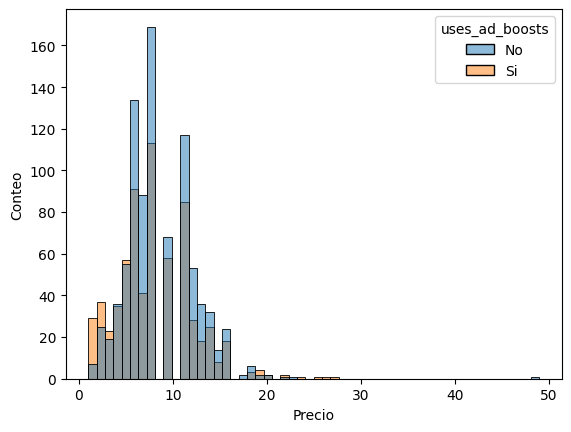

In [42]:
# 5.  ¿Cómo se distribuyen los precios de los productos en función de si se utilizan anuncios promocionales (`uses_ad_boosts`) o no?
sns.histplot(x = "price", hue = "uses_ad_boosts", data = df)
plt.ylabel("Conteo")
plt.xlabel("Precio");

In [43]:
df.columns

Index(['title', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating_sold', 'rating_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_id',
       'product_url', 'product_id', 'listed_products', 'total_units_sold',
       'mean_units_sold_per_product', 'rating_employee',
       'merchant_ratings_count', 'mean_product_prices', 'mean_retail_prices',
       'mean_product_ratings_count', 'discount_percentage',
       'seller_reputation', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'rating_five_count'],
      dtype='object')

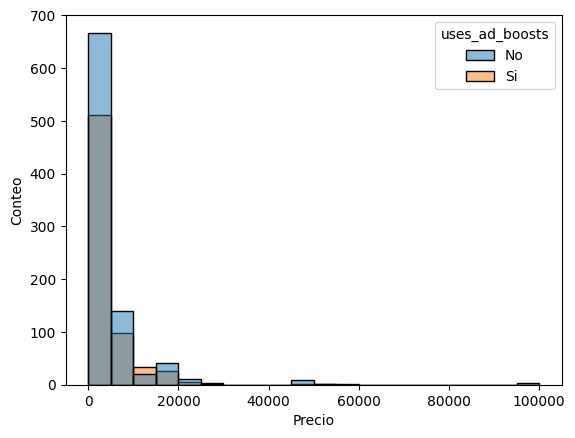

In [46]:
# 6. ¿Existe una relación entre el uso de anuncios y las unidades vendidas?
sns.histplot(x = "mean_units_sold_per_product", hue = "uses_ad_boosts", data = df, bins = 20)
plt.ylabel("Conteo")
plt.xlabel("Precio");

In [47]:
df["badge_product_quality"].unique()

array(['Buena', 'Excelente'], dtype=object)

In [48]:
# 7. ¿Cuál es la distribución de las calificaciones de los empleados (`rating_employee`) para los productos que tienen el distintivo "Buena calidad del producto" (`badge_product_quality`) y para los que no lo tienen
buenos = df[df["badge_product_quality"] == "Buena"]
excelente = df[df["badge_product_quality"] == "Excelente"]

excelente.head(2)

,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_five_count
43,2019 Women Fashion Casual Jupes courtes fleuri...,9.0,8,5000,Si,4.41,1153,No,Excelente,No,"Summer,Shorts,high waist,Skirts,Pleated,Casual...",lightyellow,M,Livraison standard,3,No,36,50,CN,pentiumhorse,89 % avis positifs,55499,5926c5ace8ff5525241b368d,https://www.wish.com/c/5cda2dc154645202d0458a14,5cda2dc154645202d0458a14,7,96000,13714.0,4.139,55499.0,6.69,6.29,2250.0,12.5,Buena,250.0,107.0,23.0,38.0,735.0
61,5 Couleur Femmes De Mode D'été Mince Sans Manc...,13.0,13,1000,No,4.16,138,No,Excelente,No,"Summer,Plus Size,Lace,Mini,Dress,slim,camoufla...",pink,S,Livraison standard,3,No,41,50,CN,ouchocoltd,85 % avis positifs,12913,55ed5a3362e273427107759e,https://www.wish.com/c/5d2fd5a9af7a0c5b21369a05,5d2fd5a9af7a0c5b21369a05,4,22100,5525.0,3.981,12913.0,11.25,29.25,972.0,0.0,Regular,27.0,10.0,7.0,12.0,82.0


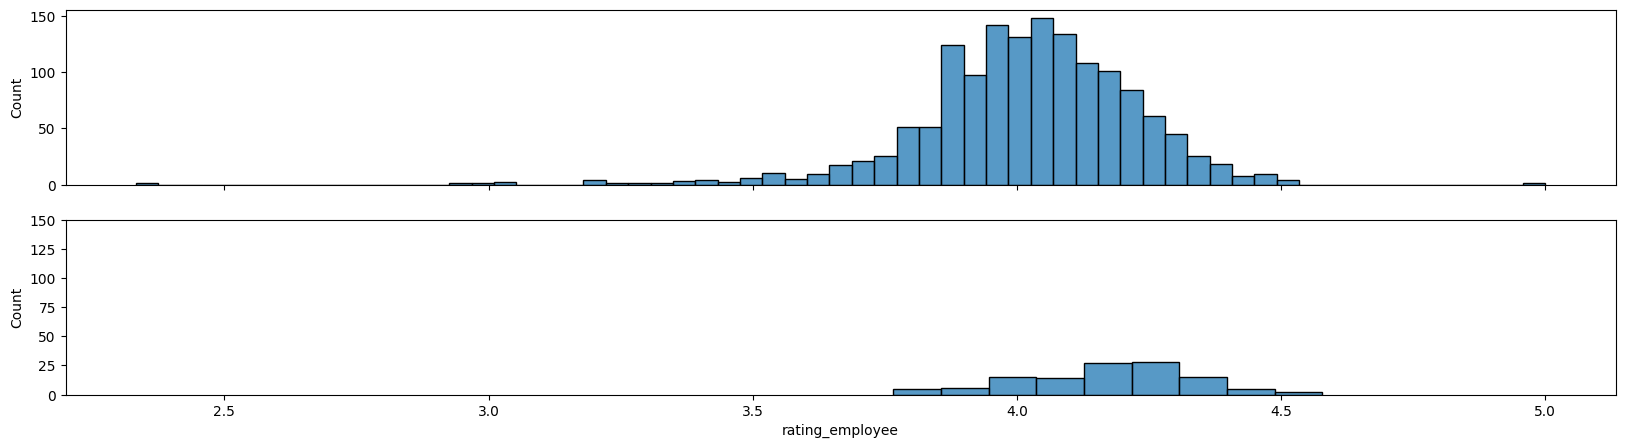

In [54]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 5), sharex= True)
sns.histplot(x = "rating_employee", data = buenos, ax = axes[0])
sns.histplot(x = "rating_employee", data = excelente, ax = axes[1])
axes[1].set_ylim([0, 150]);


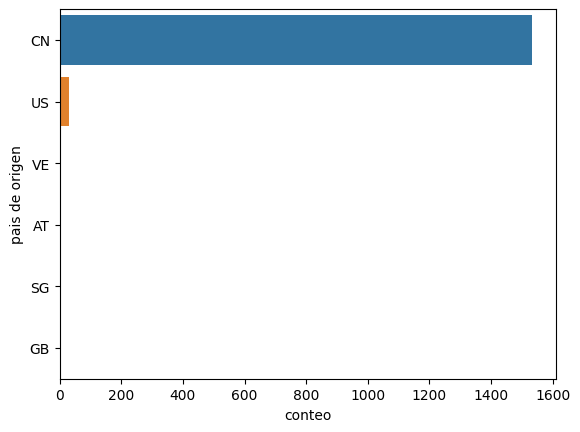

In [60]:
# 8. ¿Qué países reciben más productos de este conjunto de datos? Muestra un gráfico de barras horizontales.
sns.countplot(y = "origin_country", data = df)
plt.ylabel("pais de origen")
plt.xlabel("conteo");

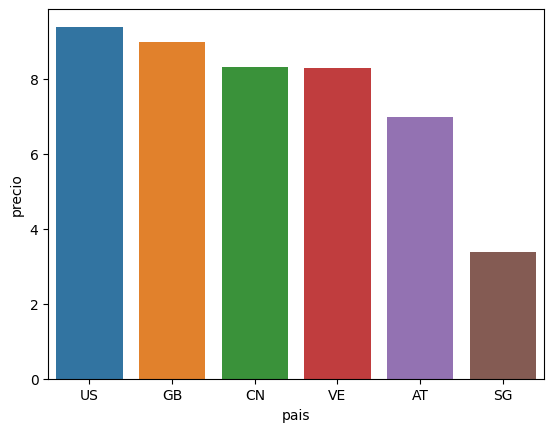

In [65]:
# 9. ¿Cómo varía el precio promedio de los productos por país de origen? Muestra un gráfico de barras.
df_paises = df.groupby("origin_country")["price"].mean().reset_index().sort_values(by = "price", ascending = False)
df_paises

sns.barplot(x = "origin_country", y = "price", data = df_paises)
plt.ylabel("precio")
plt.xlabel("pais");

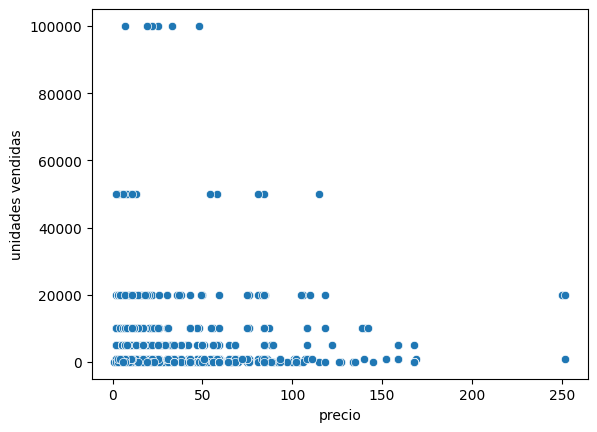

In [68]:
# 10. ¿Cuál es la relación entre el precio de envío y las unidades vendidas?
sns.scatterplot(x = "retail_price", y = "units_sold", data = df)
plt.ylabel("unidades vendidas")
plt.xlabel("precio");

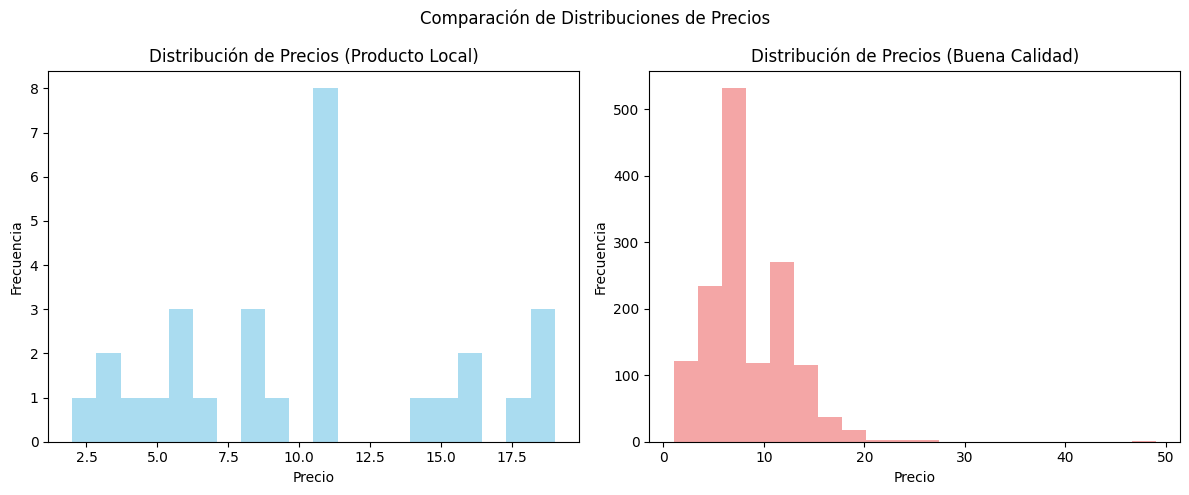

In [ ]:
# 11. Compara diferentes distribuciones de precios de productos en función de si tienen el distintivo "Producto local" o "Buena calidad del producto".
# UNA SOLUCIÓN

# Filtrar productos con distintivo "Producto local"
productos_local = df[df['badge_local_product'] == 'Si']

# Filtrar productos con distintivo "Buena calidad del producto"
productos_calidad = df[df['badge_product_quality'] == 'Buena']

# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histograma para productos "Producto local"
axes[0].hist(productos_local['price'], bins=20, color='skyblue', alpha=0.7)
axes[0].set_title('Distribución de Precios (Producto Local)')
axes[0].set_xlabel('Precio')
axes[0].set_ylabel('Frecuencia')

# Histograma para productos "Buena calidad del producto"
axes[1].hist(productos_calidad['price'], bins=20, color='lightcoral', alpha=0.7)
axes[1].set_title('Distribución de Precios (Buena Calidad)')
axes[1].set_xlabel('Precio')
axes[1].set_ylabel('Frecuencia')

# Añadir título general
plt.suptitle('Comparación de Distribuciones de Precios')
plt.tight_layout()
plt.show()

